# Gravitational Wave Analysis EDA

#### We have two seperate sets of data we are interested in exploring:

#### A: Our cleaned GWTC dataset containing each of our selected events and their respective parameters.

#### B: Strain data for each of our selected events near time of merger. 

## Part A:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('GWTC_cleaned.csv')
df.head()

,commonName,catalog.shortName,GPS,mass_1_source,mass_2_source,total_mass_source,final_mass_source,radiated_energy,network_matched_filter_snr,luminosity_distance,chi_eff,chirp_mass_source,redshift,p_astro
0,GW150914,GWTC-1-confident,1.126259e+09,35.6,30.6,66.2,63.1,3.1,26.0,440.0,-0.01,28.6,0.09,1.0
1,GW151012,GWTC-1-confident,1.128679e+09,23.2,13.6,36.8,35.6,1.2,10.0,1080.0,0.05,15.2,0.21,1.0
2,GW151226,GWTC-1-confident,1.135136e+09,13.7,7.7,21.4,20.5,0.9,13.1,450.0,0.18,8.9,0.09,1.0
3,GW170104,GWTC-1-confident,1.167560e+09,30.8,20.0,50.8,48.9,1.9,13.8,990.0,-0.04,21.4,0.20,1.0
4,GW170608,GWTC-1-confident,1.180922e+09,11.0,7.6,18.6,17.8,0.8,15.4,320.0,0.03,7.9,0.07,1.0


In [3]:
df.describe()

,GPS,mass_1_source,mass_2_source,total_mass_source,final_mass_source,radiated_energy,network_matched_filter_snr,luminosity_distance,chi_eff,chirp_mass_source,redshift,p_astro
count,7.000000e+01,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000
mean,1.240814e+09,34.232857,22.764286,56.997143,54.363429,2.633714,12.871429,1932.571429,0.074286,23.818429,0.34100,0.976192
std,3.296933e+07,17.611251,11.741269,28.855964,27.303419,1.601290,4.193271,1263.702503,0.155196,11.974817,0.19243,0.046154
min,1.126259e+09,8.800000,5.100000,13.900000,13.300000,0.500000,7.100000,320.000000,-0.290000,5.800000,0.07000,0.811560
25%,1.241889e+09,21.400000,11.825000,34.500000,33.325000,1.200000,10.225000,945.000000,-0.037500,13.600000,0.19250,0.988868
50%,1.248474e+09,35.500000,24.350000,58.350000,55.900000,2.650000,12.050000,1530.000000,0.055000,24.750000,0.29000,0.990290
75%,1.260546e+09,41.675000,30.350000,72.075000,68.300000,3.475000,14.175000,2892.500000,0.130000,30.750000,0.49750,1.000000
max,1.268431e+09,98.400000,57.200000,155.600000,147.400000,8.200000,26.800000,6130.000000,0.650000,63.300000,0.92000,1.000000


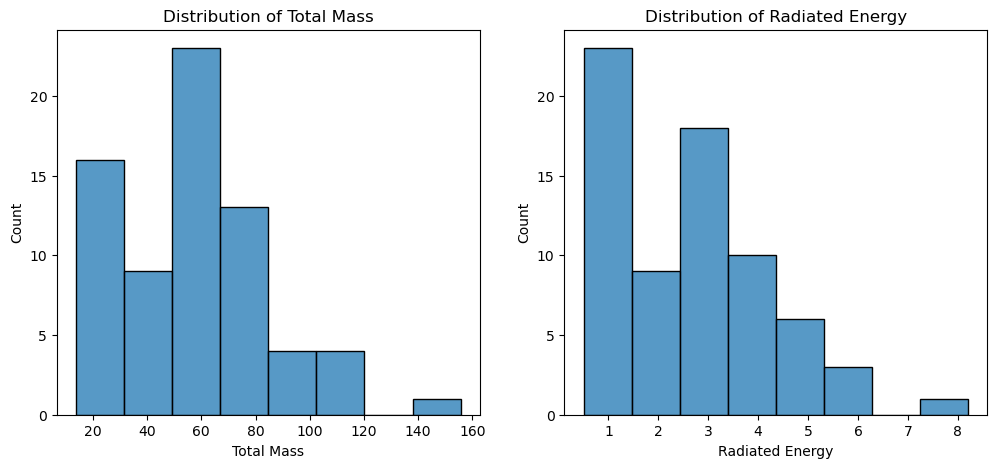

In [4]:
#Let's see how total mass and radiated energy are distributed, and if there is any correlation between the two

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(x='total_mass_source', data=df, ax=axes[0])
axes[0].set_xlabel('Total Mass')
axes[0].set_title('Distribution of Total Mass')

sns.histplot(x='radiated_energy', data=df, ax=axes[1])
axes[1].set_xlabel('Radiated Energy')
axes[1].set_title('Distribution of Radiated Energy')


plt.show()

Looks like our data is right skewed with most of the total mass per event falling between 20-80 solar masses, with a handful of larger mergers. The radiated energy per event also looks to be highly correlated with the total mass. Let's add a scatterplot to further visualize this:

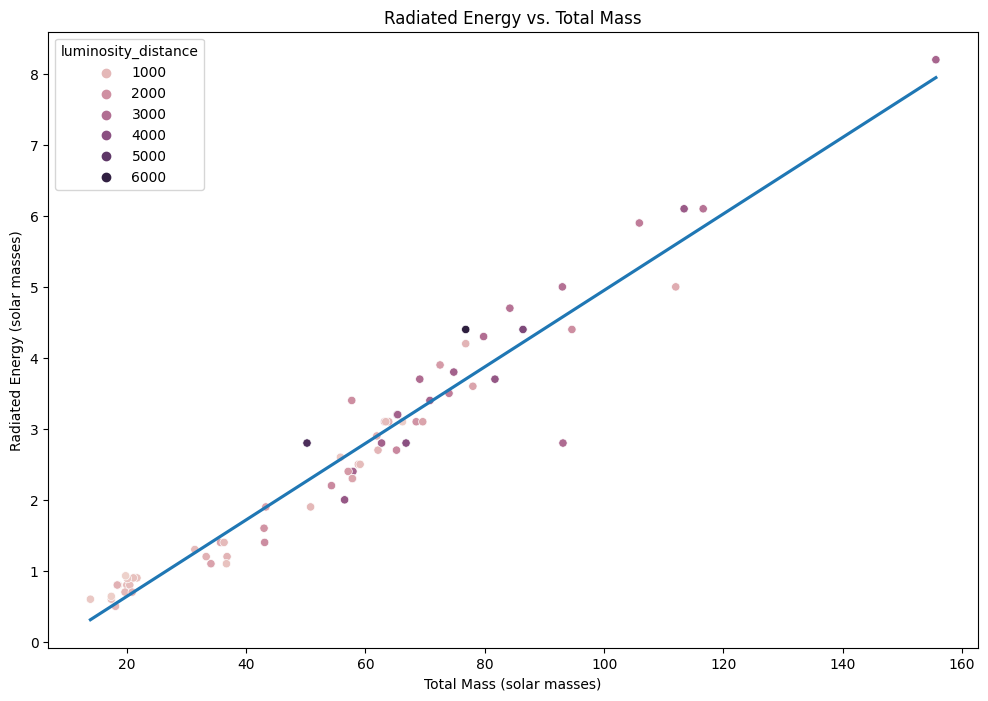

 Pearson Correlation Coefficient: 0.9712220085295429 
 R²: 0.943272189852158 
 P-Value: 4.221460925916524e-44


In [3]:
#Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x="total_mass_source", y="radiated_energy", data=df, hue = 'luminosity_distance')
sns.regplot(x="total_mass_source", y="radiated_energy", scatter=False, data=df, ci =None)

plt.title("Radiated Energy vs. Total Mass")
plt.xlabel("Total Mass (solar masses)")
plt.ylabel("Radiated Energy (solar masses)")

plt.show()

#Adding further statistical analysis
from scipy.stats import pearsonr, linregress

pearson_corr, p_value = pearsonr(df['total_mass_source'], df['radiated_energy'])

regression_result = linregress(df['total_mass_source'], df['radiated_energy'])
r_squared = regression_result.rvalue ** 2

print(' \033[1mPearson Correlation Coefficient:\033[0m',pearson_corr, '\n', 
      '\033[1mR²:\033[0m', r_squared, '\n',
      '\033[1mP-Value:\033[0m', p_value)

The regression line and statistical parameters confirm our suspicion that there is a strong linear relationship between total mass and radiated energy. The luminosity distance was color coded into the graph to see if distance has any affect on the variance for each event, but from a first visual glance there is no clear indication. However, we do seem to have spotted an outlier, which looks to have a total mass of about ~95 solar masses while only having radiated less than 3 solar masses of energy after the merger. Let's see if we can pinpoint this outlier in our dataset:

In [6]:
outlier = df[(df['total_mass_source'] > 90) & (df['total_mass_source'] < 100) & 
                        (df['radiated_energy'] > 2.5) & (df['radiated_energy'] < 3)]
outlier

,commonName,catalog.shortName,GPS,mass_1_source,mass_2_source,total_mass_source,final_mass_source,radiated_energy,network_matched_filter_snr,luminosity_distance,chi_eff,chirp_mass_source,redshift,p_astro
44,GW190929_012149,GWTC-2.1-confident,1.253755e+09,66.3,26.8,93.1,90.3,2.8,9.7,3130.0,-0.03,35.6,0.53,0.87042


There we have it, GW190929_012149. I'll recreate the scatterplot from above to make it more visible:

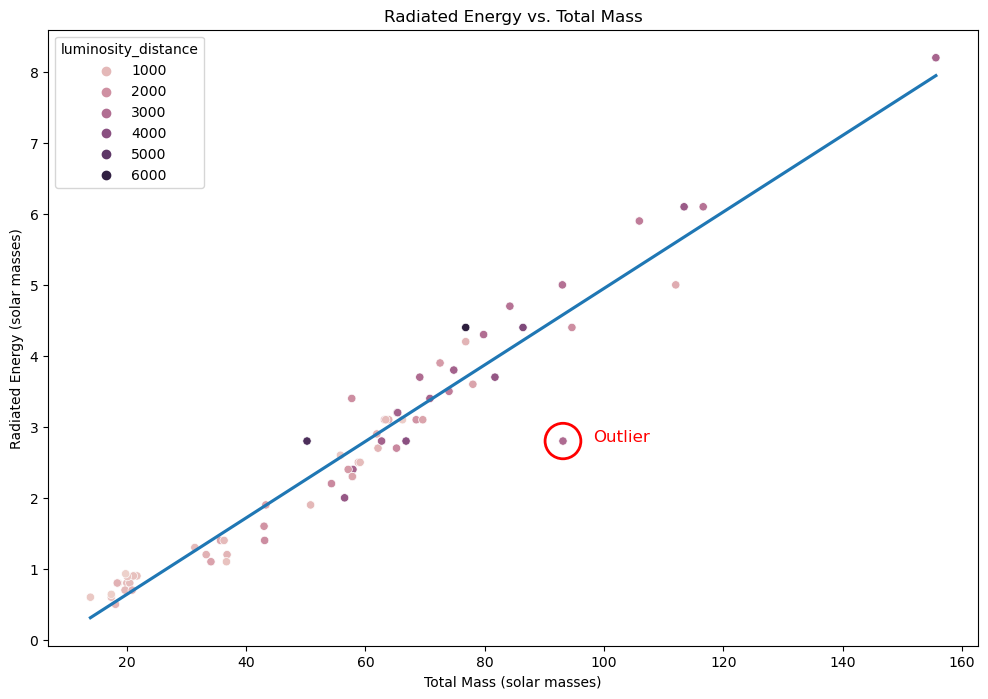

In [7]:
from matplotlib.patches import Ellipse

plt.figure(figsize=(12, 8))

sns.scatterplot(x="total_mass_source", y="radiated_energy", data=df, hue='luminosity_distance')
sns.regplot(x="total_mass_source", y="radiated_energy", data=df, scatter=False, ci=None)

outlier_x = outlier['total_mass_source'].iloc[0]
outlier_y = outlier['radiated_energy'].iloc[0]

# Adding a circle around the outlier
circle = Ellipse((outlier_x, outlier_y), width=6, height=0.5, edgecolor='red', facecolor='none', lw=2)
plt.gca().add_patch(circle)

# Adding text next to the outlier
plt.text(outlier_x + 5, outlier_y, 'Outlier', color='red', fontsize=12)

plt.title("Radiated Energy vs. Total Mass")
plt.xlabel("Total Mass (solar masses)")
plt.ylabel("Radiated Energy (solar masses)")
plt.show()

In [30]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

from scipy import stats
ratio_ = df.radiated_energy / df.total_mass_source

th_ = 70
gp1 = ratio_[df.total_mass_source >= th_]
gp2 = ratio_[(df.total_mass_source < th_)]

stats.ttest_ind(gp1, gp2, trim=0.2), gp1.mean(), gp2.mean()

(Ttest_indResult(statistic=5.971983244010179, pvalue=4.3582545455685675e-07),
 0.05018308840850766,
 0.04182415329999957)

According to the regression line, GW190929_012149 should have radiated an amount closer to ~4.5 instead of just 2.8 solar masses as we have in our dataset. Either there was a mistake in the original parameter estimations or this event represents an anomoly in the way the two black holes merged, which could provide interesting physical insights. However, if we remember the large error bars from our initial dataset, it is more likely this is just the result of imprecise calcuations. Nonetheless, we will make note of GW190929_012149 as needing further review.

Let's explore the radiated energy as a percentage of the total mass for each event and then plot the distribution:

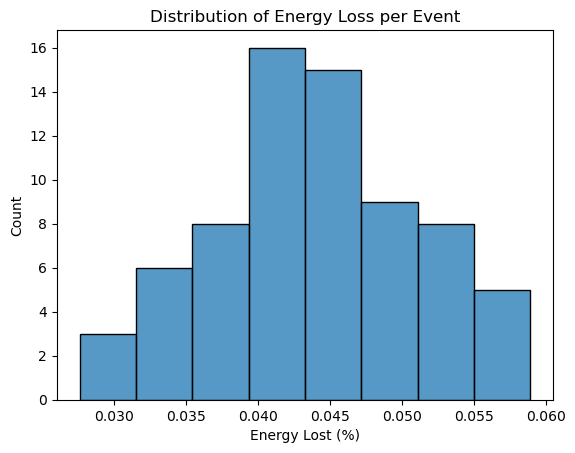

In [8]:
radiated_energy = df['radiated_energy']
total_mass = df['total_mass_source']

energy_lost_ratio = radiated_energy/total_mass #percentage of energy that radiated away from the total mass after merger
sns.histplot(energy_lost_ratio)
plt.xlabel('Energy Lost (%)')
plt.title('Distribution of Energy Loss per Event')

plt.show()

Interesting, for most merger events the radiated energy represents somewhere between 4-5% of the original total mass of the binary system. 

Let's check some more stats:

In [9]:
print(energy_lost_ratio.describe())

count    70.000000
mean      0.044093
std       0.007259
min       0.027624
25%       0.039792
50%       0.043679
75%       0.048921
max       0.058925
dtype: float64


Since GW190929_012149 was our outlier, we should expect that it should have the lowest percentage in our dataset. Let's check:

In [10]:
GW190929_012149_ratio = 2.8/93.1
print('GW190929_012149 ratio:', GW190929_012149_ratio)

GW190929_012149 ratio: 0.03007518796992481


That is surprising. Let's add a new column to our dataframe and sort it to see which events had a lower percentage than GW190929_012149:

In [11]:
df.insert(8, 'energy_lost_%', energy_lost_ratio)

In [12]:
sorted_df = df.sort_values(by='energy_lost_%', ascending=True)
sorted_df

,commonName,catalog.shortName,GPS,mass_1_source,mass_2_source,total_mass_source,final_mass_source,radiated_energy,energy_lost_%,network_matched_filter_snr,luminosity_distance,chi_eff,chirp_mass_source,redshift,p_astro
32,GW190725_174728,GWTC-2.1-confident,1.248112e+09,11.8,6.3,18.1,17.6,0.5,0.027624,9.1,1030.0,-0.04,7.4,0.20,0.96021
11,GW190412,GWTC-2.1-confident,1.239082e+09,27.7,9.0,36.7,35.6,1.1,0.029973,19.8,720.0,0.21,13.3,0.15,1.00000
44,GW190929_012149,GWTC-2.1-confident,1.253755e+09,66.3,26.8,93.1,90.3,2.8,0.030075,9.7,3130.0,-0.03,35.6,0.53,0.87042
39,GW190828_065509,GWTC-2.1-confident,1.251011e+09,23.7,10.4,34.1,33.0,1.1,0.032258,10.2,1540.0,0.05,13.4,0.29,0.99998
66,GW200306_093714,GWTC-3-confident,1.267523e+09,28.3,14.8,43.1,41.7,1.4,0.032483,7.8,2100.0,0.32,17.5,0.38,0.81156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,GW190519_153544,GWTC-2.1-confident,1.242315e+09,65.1,40.8,105.9,100.0,5.9,0.055713,15.9,2600.0,0.33,44.3,0.45,1.00000
67,GW200308_173609,GWTC-3-confident,1.267724e+09,36.4,13.8,50.2,47.4,2.8,0.055777,7.1,5400.0,0.65,19.0,0.83,0.85660
5,GW170729,GWTC-1-confident,1.185390e+09,50.2,34.0,84.2,79.5,4.7,0.055819,10.8,2840.0,0.37,35.4,0.49,0.98000
37,GW190805_211137,GWTC-2.1-confident,1.249075e+09,46.2,30.6,76.8,72.4,4.4,0.057292,8.1,6130.0,0.37,31.9,0.92,0.95372


This is even more surprising, given that the event with the lowest percentage of lost energy (GW190725_174728) is almost on top of the regression line. Wonder what am I missing here?

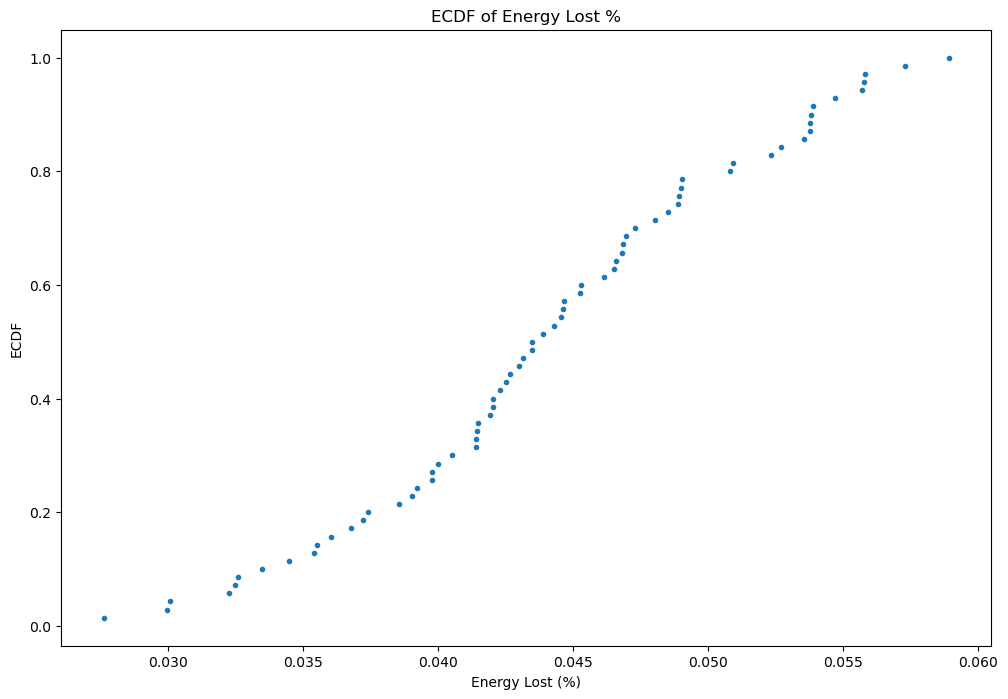

In [13]:
x = np.sort(sorted_df['energy_lost_%'])
y = np.arange(1, len(x) + 1) / len(x)

# Creating an ECDF plot to further visualize the distribution
plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='.', linestyle='none')
plt.title("ECDF of Energy Lost %")
plt.xlabel("Energy Lost (%)")
plt.ylabel("ECDF")

plt.show()

I will leave it at that for now.

In the meantime, let's explore other relationships in the data:

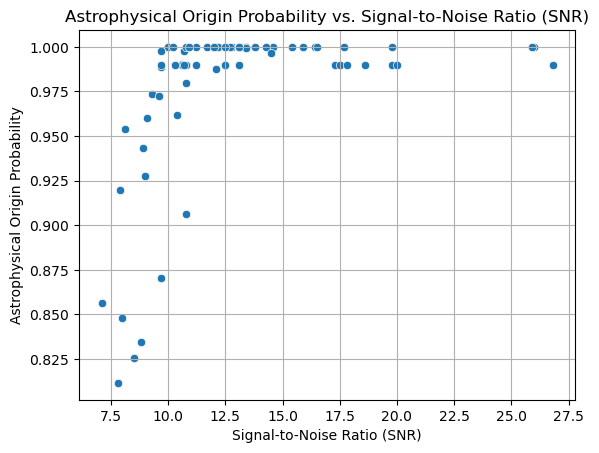

In [14]:
#Plot of astrophysical origin probability vs. Signal-to-Noise Ratio (SNR)

sns.scatterplot(x='network_matched_filter_snr', y = 'p_astro', data = df)

plt.xlabel('Signal-to-Noise Ratio (SNR)')
plt.ylabel('Astrophysical Origin Probability')
plt.title('Astrophysical Origin Probability vs. Signal-to-Noise Ratio (SNR)')
plt.grid(True)
plt.show()

The Signal-to-Noise Ratio is used to quantify how much a signal (in this case a gravitational wave) stands out from the background noise. A higher SNR means that the signal is clearer and more distinguishable from the noise. In gravitational wave astronomy, detecting signals with a high SNR is crucial due to the extremely subtle nature of these phenomena.

From the graph above, it is interesting to see that events with an SNR less than ~11 experience a sharp drop in the probability that they are truly of astrophysical origin.

Let's continue exploring other relationships:

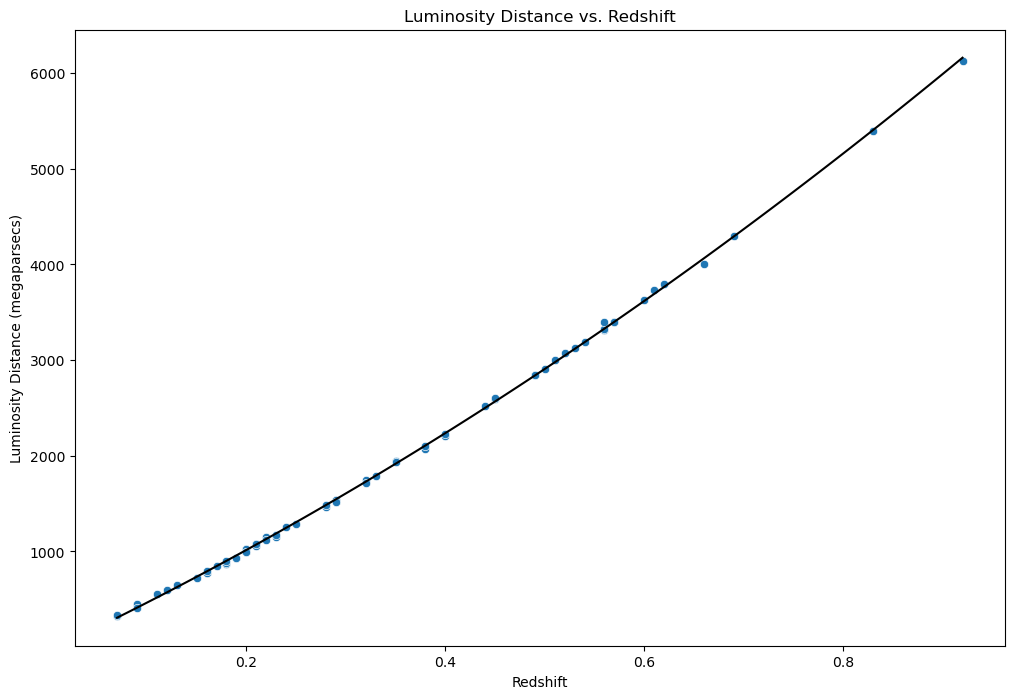

In [15]:
from numpy import polyfit, poly1d

plt.figure(figsize=(12, 8))

# Fitting a polynomial regression to the data
degree = 2
coefficients = polyfit(df['redshift'], df['luminosity_distance'], degree)
polynomial = poly1d(coefficients)

# Generating x values (redshifts) for the regression line
x_values = np.linspace(df['redshift'].min(), df['redshift'].max(), 100)
y_values = polynomial(x_values)

# Creating the scatter plot with the polynomial regression line
sns.scatterplot(x="redshift", y="luminosity_distance", data=df)
plt.plot(x_values, y_values, color='black', label=f'Polynomial Regression (Degree {degree})')

plt.title("Luminosity Distance vs. Redshift")
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance (megaparsecs)")
plt.show()

Redshift here refers to a phenomenon where the wavelength of a gravitational wave is stretched as the universe expands. This is analogous to the redshift observed in the light from distant astronomical objects which tend to shift to a 'red' color at lower energies in the electromagnetic spectrum. In the case of gravitational waves, this stretching leads to a decrease in the frequency of the waves.

The further out in space a signal comes from, the more it will be stretched by the expansion of space. This is why it is not surprising to see larger redshift values at longer distances. However, it is interesting to see a slight exponential curve in the graph, and this is most likely attributed to the fact that not only is the universe is expanding, but the expansion is accelerating. 

This makes me excited to expirement with our data and try to estimate the Hubble constant, which itself is known to be notoriously difficult to determine (see here: https://en.wikipedia.org/wiki/Hubble%27s_law#Determining_the_Hubble_constant)

In [16]:
# z = redshift
# d_l = luminosity distance
# c = speed of light

def Hubble_constant(z, d_l, c = 299792):
    H_0 = (z*c)/d_l
    return H_0

In [17]:
z = [i for i in df['redshift']]

In [18]:
d_l = [i for i in df['luminosity_distance']]

In [19]:
H_0 = [Hubble_constant(z[i], d_l[i]) for i in range(70)]

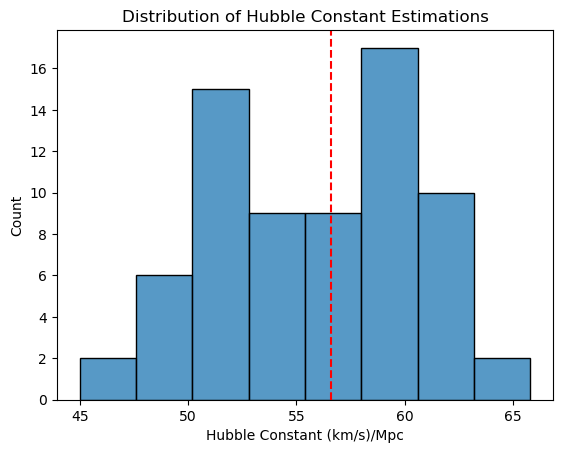

In [20]:
#Plot of our Hubble constant estimations for each merger event 

sns.histplot(H_0)
plt.xlabel('Hubble Constant (km/s)/Mpc')
plt.title('Distribution of Hubble Constant Estimations')

# Add a vertical line for the median
plt.axvline(np.median(H_0), color='red', linestyle='--')

plt.show()

In [21]:
print('Median Value:', np.median(H_0), '(km/s)/Mpc')

Median Value: 56.58587153387153 (km/s)/Mpc



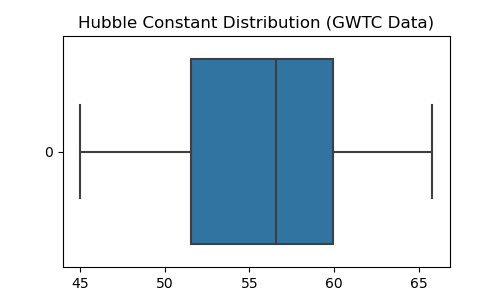

In [22]:
from IPython.display import display, HTML
from io import BytesIO
import base64


# Boxplot
plt.figure(figsize=(5, 3))  
sns.boxplot(H_0, orient='h')
plt.title('Hubble Constant Distribution (GWTC Data)')

# Saving plot to a BytesIO object
img_data = BytesIO()
plt.savefig(img_data, format='png')
plt.close()
img_data.seek(0)

# Just some fancy stuff to get the plot positioned where I want it
uri = 'data:image/png;base64,' + base64.b64encode(img_data.read()).decode('utf-8')
html = '<div style="margin-left: 12.7%; margin-top: 10px; margin-bottom: 10px;"><img src="{}" style="display: inline;"></div>'.format(uri)
display(HTML(html))

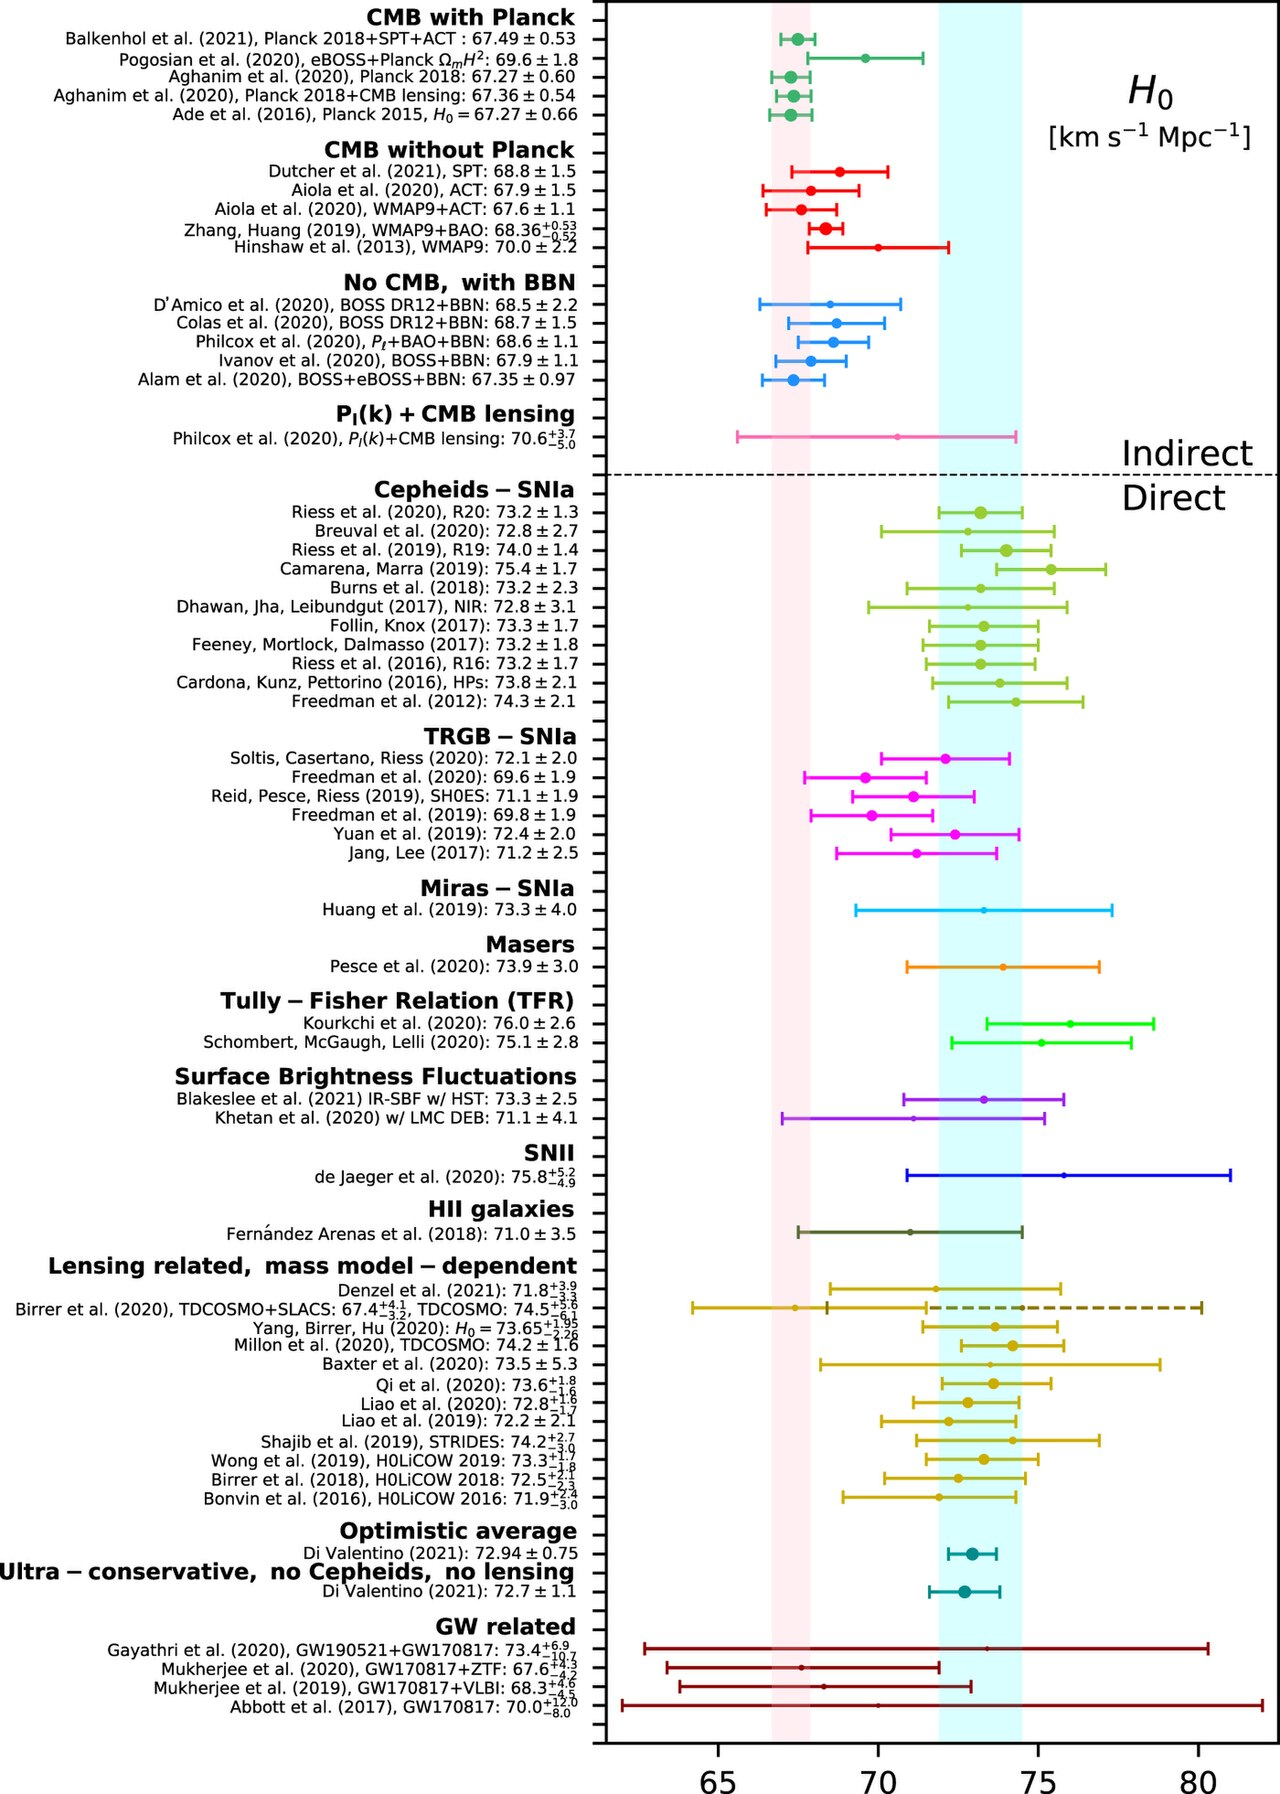

Source: https://iopscience.iop.org/article/10.1088/1361-6382/ac086d

When comparing our boxplot above to other estimates from multiple sources/expirements, we can see that most of our values fall outside the typical spread. However, at least some of our measurements (the upper ones) fall in the range from some other expirements, but still on the lower end compared to most accepted values which place the Hubble constant at around ~70 (km/s)/Mpc.

Alright, time to move on to the strain data:

## Part B:

In [23]:
from gwpy.timeseries import TimeSeries
from gwosc.datasets import event_gps

In [24]:
events = [i for i in df['commonName']] #List of all our events
filepath = 'HDF5 files/' + events[0] + '.hdf5' #events[0] is our first ever detection – GW150914

We will begin by analyzing the strain data for GW150914 and then generalize the process for all other events:

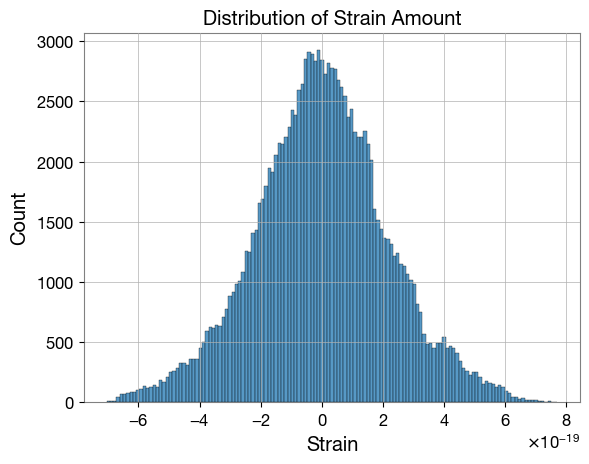

In [25]:
strain = TimeSeries.read(filepath, format='hdf5.gwosc')

sns.histplot(strain)
plt.xlabel('Strain')
plt.title('Distribution of Strain Amount')
plt.show()

We can see from above that most of the data centered around 0 is just random noise which can come in many forms, such as seismic, thermal, and quantum noise. See here for full list: https://www.ligo.org/science/Publication-O1Noise/index.php).

The interesting data is on the extreme ends of the histogram, this is where the frequency oscillations from a gravitational wave signal are hiding.

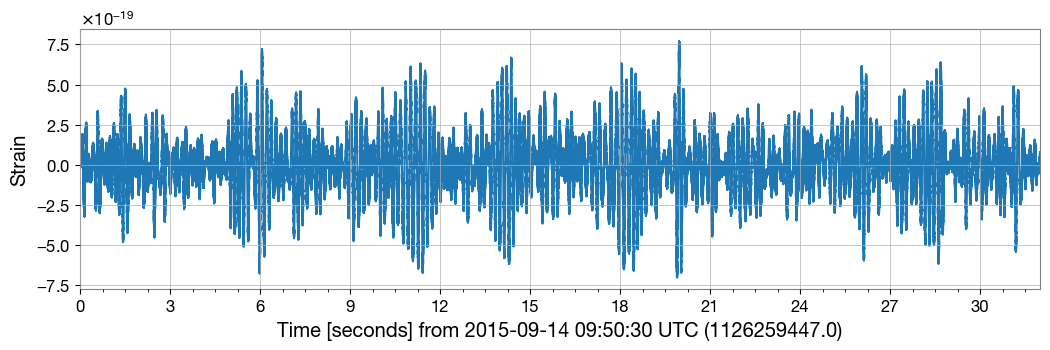

In [26]:
#Let's visualize the data as a time series

Time_series = strain.plot()
plt.ylabel('Strain')
plt.show()

The data is still very noisy. A common next step in gravitational wave analysis is to whiten the data. Whitening the data adjusts it to roughly equal amounts of power at each frequency. This will tend to suppress places with high noise, and highlight places with low noise, which is helpful for finding signals because frequencies with low noise are where the observatories are most sensitive.

Time of detection: 1126259462.4


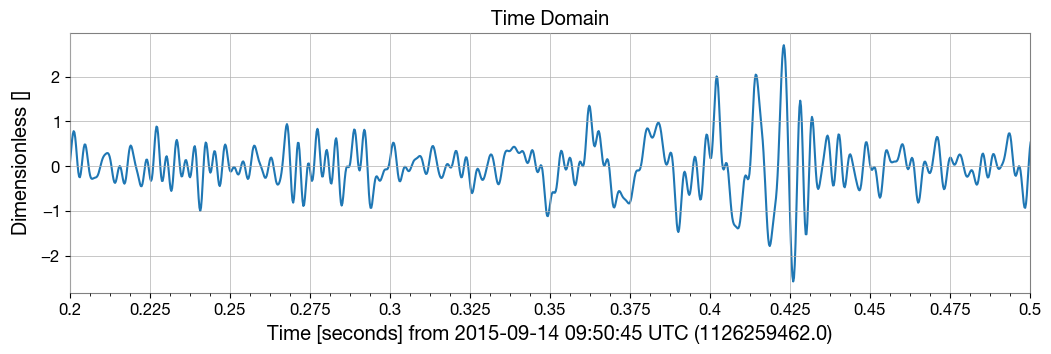

In [27]:
whitened_data = strain.whiten()
bp_data = whitened_data.bandpass(35, 350)

gps = event_gps(events[0])
print('Time of detection:', gps)

filtered_plot = bp_data.plot()
plt.title('Time Domain')
plt.xlim(gps-0.2, gps+0.1)
plt.show()

Above we can finally start to see an interesting wavelet pattern. Now that we have a time domain plot, we also want to convert it to a time-frequency plot (spectrogram):

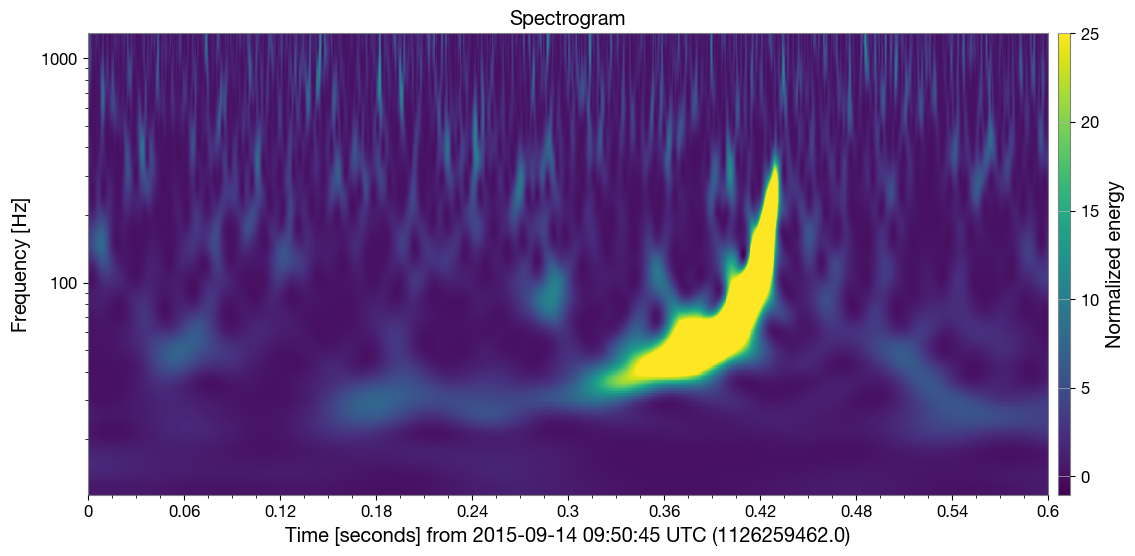

In [28]:
q = strain.q_transform(outseg=(gps-0.4, gps+0.2))
spectrogram = q.plot()
ax = spectrogram.gca()
spectrogram.colorbar(label="Normalized energy", vmax = 25)
ax.grid(False)
ax.set_yscale('log')
plt.title('Spectrogram')

plt.show()

Awesome! This looks great. Next step is to figure out how to extract the peak frequency from the graph in order to calculate other features such as black hole mass. Still trying to figure this out.

In the meantime:

In [29]:
#Function that will create a spectrogram for any of the events in our dataset

def q_plots(event):
    
    filepath = 'HDF5 files/' + event + '.hdf5'
    strain = TimeSeries.read(filepath, format='hdf5.gwosc')
    gps = event_gps(event)

    q = strain.q_transform(outseg=(gps-0.3, gps+0.3), qrange = (5,5))
    spectrogram = q.plot()
    ax = spectrogram.gca()
    spectrogram.colorbar(label="Normalized energy", vmax = 25)
    ax.grid(False)
    ax.set_yscale('log')
    ax.set_ylim(bottom=10, top=1000)
    plt.title('Spectrogram')
    
    plt.show()

In [30]:
#List of all event names in our dataset
events

['GW150914',
 'GW151012',
 'GW151226',
 'GW170104',
 'GW170608',
 'GW170729',
 'GW170809',
 'GW170814',
 'GW170818',
 'GW170823',
 'GW190408_181802',
 'GW190412',
 'GW190413_052954',
 'GW190413_134308',
 'GW190421_213856',
 'GW190503_185404',
 'GW190512_180714',
 'GW190513_205428',
 'GW190517_055101',
 'GW190519_153544',
 'GW190521',
 'GW190521_074359',
 'GW190527_092055',
 'GW190602_175927',
 'GW190620_030421',
 'GW190630_185205',
 'GW190701_203306',
 'GW190706_222641',
 'GW190707_093326',
 'GW190708_232457',
 'GW190719_215514',
 'GW190720_000836',
 'GW190725_174728',
 'GW190727_060333',
 'GW190728_064510',
 'GW190731_140936',
 'GW190803_022701',
 'GW190805_211137',
 'GW190828_063405',
 'GW190828_065509',
 'GW190910_112807',
 'GW190915_235702',
 'GW190924_021846',
 'GW190925_232845',
 'GW190929_012149',
 'GW190930_133541',
 'GW191103_012549',
 'GW191105_143521',
 'GW191109_010717',
 'GW191129_134029',
 'GW191204_171526',
 'GW191215_223052',
 'GW191216_213338',
 'GW191222_033537',
 'GW

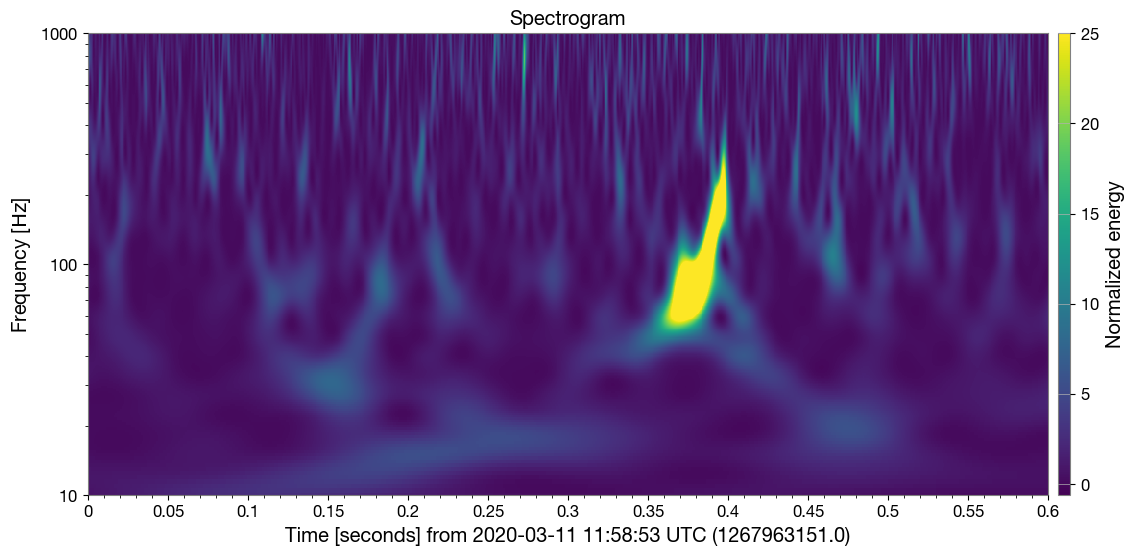

In [31]:
#Pick any you like and see the result!

#Example:
q_plots('GW200311_115853')

Compare: https://gwosc.org/eventapi/html/GWTC-3-confident/GW200311_115853/v1/

All other events can be found on this page: https://gwosc.org/eventapi/html/GWTC/